In [1]:
def readInput16(infile):
    with open(infile) as f:
        return [ l.strip("\n") for l in f.readlines() ]

In [162]:
from queue import Queue
from collections import defaultdict

# directions (dx,dy)
dirs = {"N": (0,-1), "W": (-1,0), "S": (0,+1), "E": (+1,0)}

def propagate_beam(grid,start=((-1,0),"E"),verbose=False):

    q = Queue()
    energized = defaultdict(set)
    q.put(start)

    while not q.empty():
            
        # get current light beam from queue and try to move it to next position
        (x,y),m = q.get()
        
        xnext, ynext = x+dirs[m][0], y+dirs[m][1]
        pnext = (xnext,ynext)
        
        # next position is outside the grid, discard light beam
        if xnext<0 or xnext>=len(grid[0]) or ynext<0 or ynext>=len(grid):
            if verbose: print("out of grid")
            continue
        
        if verbose: print(pnext,grid[ynext][xnext],m)

        # discard if a beam already passed in this position with this direction to avoid light loops
        if m in energized[pnext]:
            continue
            
        energized[pnext].add(m)
        
        if grid[ynext][xnext]==".": # continue in same direction
            q.put((pnext,m)) 

        elif grid[ynext][xnext]=="|":
            if m=="N" or m=="S": # if coming from N or S continue in same direction
                q.put((pnext,m)) 
            elif m=="E" or m=="W": # if coming from E or W, split N and S
                q.put((pnext,"N"))
                q.put((pnext,"S"))

        elif grid[ynext][xnext]=="-":
            if m=="W" or m=="E": # if coming from W or E continue in same direction
                q.put((pnext,m)) 
            elif m=="N" or m=="S": # if coming from N or S, split W and E
                q.put((pnext,"W"))
                q.put((pnext,"E"))           

        elif grid[ynext][xnext]=='/':
            if m=="E": # -> N
                q.put((pnext,"N"))
            if m=="S": # -> W
                q.put((pnext,"W"))
            if m=="W": # -> S
                q.put((pnext,"S"))
            if m=="N": # -> E
                q.put((pnext,"E"))  

        elif grid[ynext][xnext]=='\\':
            if m=="E": # -> S
                q.put((pnext,"S"))
            if m=="S": # -> E
                q.put((pnext,"E"))  
            if m=="W": # -> N
                q.put((pnext,"N"))
            if m=="N": # -> W                
                q.put((pnext,"W"))
        
    return energized

def part1(infile):
    grid = readInput16(infile)
    energized = propagate_beam(grid)
    return len(energized.keys())

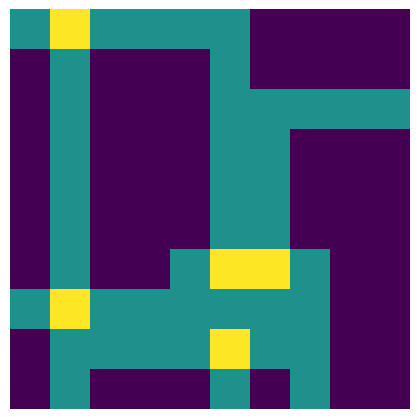

In [183]:
import matplotlib.pyplot as plt
import numpy as np

grid = readInput16("examples/example16.txt")
energized = propagate_beam(grid)
energies = np.zeros((len(grid),len(grid[0])))

for (x,y),e in energized.items():
    energies[y,x] = len(e)
    
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
_ = plt.imshow(energies)

In [164]:
print("Test 1:",part1("examples/example16.txt"))
print("Part 1:",part1("AOC2023inputs/input16.txt"))

Test 1: 46
Part 1: 7415


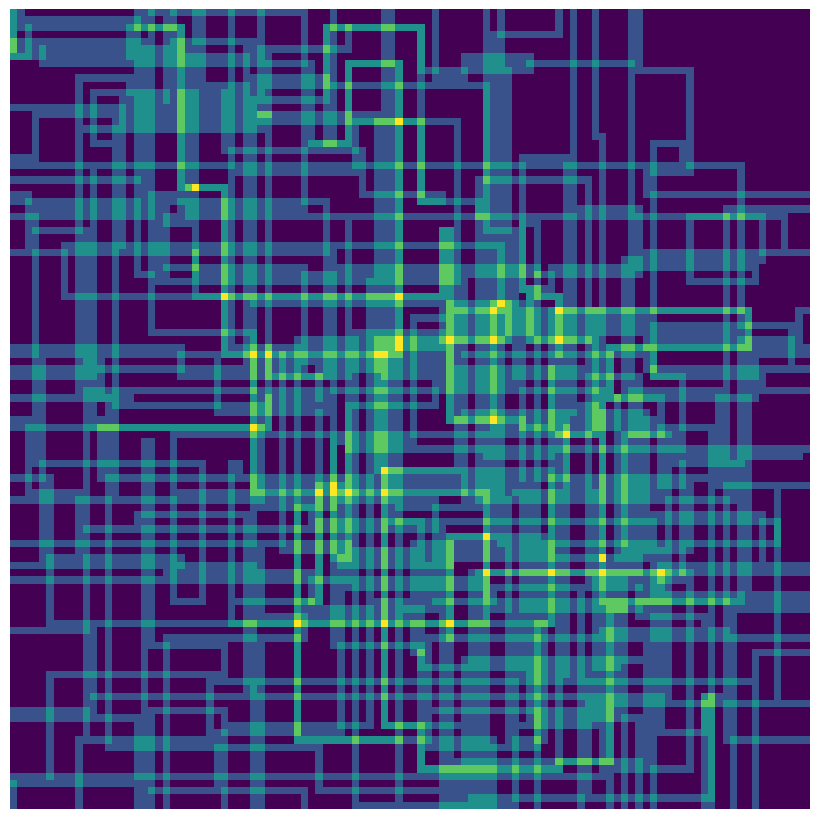

In [181]:
grid = readInput16("AOC2023inputs/input16.txt")

energized = propagate_beam(grid)
energies = np.zeros((len(grid),len(grid[0])))

for (x,y),e in energized.items():
    energies[y,x] = len(e)

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
_ = plt.imshow(energies)

In [172]:
def part2(infile):
    grid = readInput16(infile)
    
    starts  = [ ((x,-1),"S") for x in range(len(grid[0])) ] # top
    starts += [ ((-1,y),"E") for y in range(len(grid))    ] # left
    starts += [ ((x,len(grid)),"N") for x in range(len(grid[0])) ] # bottom
    starts += [ ((len(grid[0]),y),"E") for y in range(len(grid)) ] # left
    
    energ = []
    for s in starts:
        energized = propagate_beam(grid,s)
        energ.append(len(energized.keys()))
    
    return max(energ)

In [175]:
print("Test 2:",part2("examples/example16.txt"))
print("Part 2:",part2("AOC2023inputs/input16.txt"))

Test 2: 51
Part 2: 7943
